# Binary Classification on Iris Dataset

This project demonstrates the implementation and comparison of two fundamental classification algorithms:
1. Logistic Regression
2. K-Nearest Neighbors (KNN)

We use a subset of the famous Iris dataset, focusing on binary classification between two species.

## Project Objectives
1. Data Preprocessing
   - Feature scaling using StandardScaler
   - Dimensionality reduction using PCA
2. Model Implementation
   - Logistic Regression classifier
   - K-Nearest Neighbors with different k values
3. Performance Analysis
   - Visualization of decision boundaries
   - Comparison of model accuracies

### Required Libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Data Preprocessing Workflow

1. **Data Selection**
   - Extract first 100 samples from Iris dataset
   - This gives us binary classification (2 classes only)

2. **Train-Test Split**
   - Split data with random_state=8 for reproducibility
   - Default 75%-25% train-test split

3. **Feature Scaling**
   - StandardScaler for feature normalization
   - Fit on training data
   - Transform both training and test data

4. **Dimensionality Reduction**
   - PCA to reduce features to 2 dimensions
   - Enables easy visualization of results
   - Maintains most important features

In [32]:
data_iris = load_iris()
x_data = data_iris['data'][:100]
y_target = data_iris['target'][:100]

x_train, x_test, y_train_, y_test = train_test_split(x_data, y_target, random_state=8)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components=2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test))

## Logistic Regression Implementation

### Model Training
- Fit logistic regression on transformed data
- Calculate decision boundary
- Predict on both train and test sets

In [33]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

y_pred_target_test = logistic_regression.predict(x_test)
y_pred_target_train = logistic_regression.predict(x_train)

coefficients = logistic_regression.coef_[0]
intercept = logistic_regression.intercept_[0]

x_threshold = np.array([np.min(x_train[:, 0]), np.max(x_train[:, 0])])

y_threshold = (- coefficients[0] * x_threshold / coefficients[1] -
               intercept / coefficients[1])


### Visualization
The 2x2 plot shows:
1. Original data distribution
2. Training data with decision boundary
3. Test data predictions
4. Training data predictions

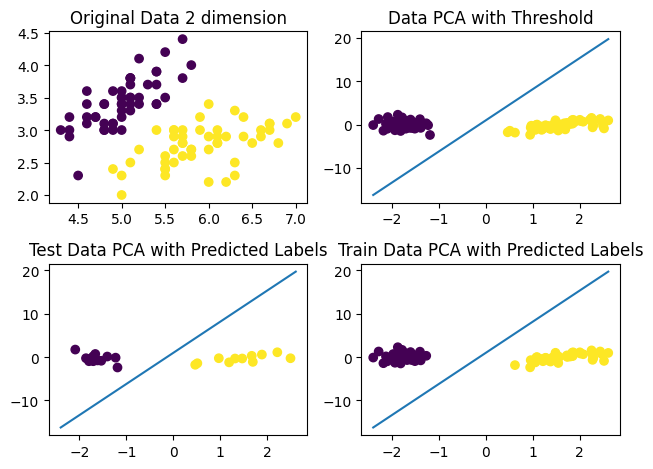

In [34]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].scatter(x_data[:, 0], x_data[:, 1], c=y_target)
ax[0, 0].set_title('Original Data 2 dimension')

ax[0, 1].scatter(x_combined[:, 0], x_combined[:, 1], c=y_combined)
ax[0, 1].plot(x_threshold, y_threshold)
ax[0, 1].set_title('Data PCA with Threshold')

ax[1, 0].scatter(x_test[:, 0], x_test[:, 1], c=y_pred_target_test)
ax[1, 0].plot(x_threshold, y_threshold)
ax[1, 0].set_title('Test Data PCA with Predicted Labels')

ax[1, 1].scatter(x_train[:, 0], x_train[:, 1], c=y_pred_target_train)
ax[1, 1].plot(x_threshold, y_threshold)
ax[1, 1].set_title('Train Data PCA with Predicted Labels')
plt.tight_layout()

plt.show()

### Performance Metrics
Accuracy scores for both training and test sets

In [35]:
# Get the scores for training and test data
train_score = logistic_regression.score(x_train, y_train)
test_score = logistic_regression.score(x_test, y_test)
train_accuracy = metrics.accuracy_score(y_train, y_pred_target_train)
test_accuracy = metrics.accuracy_score(y_test, y_pred_target_test)
# Create a DataFrame to display the results
results = pd.DataFrame({
    'Dataset': ['Training Data', 'Test Data'],
    'Score': [train_score, test_score],
    'Accuracy': [train_accuracy, test_accuracy]
})

# Display the table
results

,Dataset,Score,Accuracy
0,Training Data,1.0,1.0
1,Test Data,1.0,1.0


## K-Nearest Neighbors Implementation

### Model Features
- Implements KNN with variable number of neighbors (k = 1,...,10)
- Provides both visual and numerical results

### Performance Analysis
For each k value:
1. Calculate accuracy metrics
2. Generate visualization (optional)
3. Compare train vs test performance

In [36]:
def k_nearest_neighbors(number_neighbors, graphs=False):
    """
    Implements K-Nearest Neighbors classifier and evaluates its performance.

    Parameters
    ----------
    number_neighbors : int
        Number of neighbors to use for classification
    graphs : bool, optional (default=False)
        If True, generates visualization plots

    Returns
    -------
    list
        Contains four metrics:
        1. Test data accuracy
        2. Test data score
        3. Train data accuracy
        4. Train data score

    Visualization (if graphs=True)
    -----------------------------
    2x2 subplot showing:
    - Original data distribution
    - Training data
    - Test predictions
    - Training predictions
    """

    k_neighbors = KNeighborsClassifier(number_neighbors)

    k_neighbors.fit(x_train, y_train)

    y_test_predicted_kn = k_neighbors.predict(x_test)
    y_train_predicted_kn = k_neighbors.predict(x_train)

    if graphs:
        fig_k, ax_k = plt.subplots(2, 2)

        ax_k[0, 0].scatter(x_data[:, 0], x_data[:, 1], c=y_target)
        ax_k[0, 0].set_title('Original Data 2 dimension')

        ax_k[0, 1].scatter(x_train[:, 0], x_train[:, 1], c=y_train)
        ax_k[0, 1].set_title('Training Data')

        ax_k[1, 0].scatter(x_test[:, 0], x_test[:, 1], c=y_test_predicted_kn)
        ax_k[1, 0].set_title('Test Data with Predicted Labels')

        ax_k[1, 1].scatter(x_train[:, 0], x_train[:, 1], c=y_train_predicted_kn)
        ax_k[1, 1].set_title('Train Data with Predicted Labels')

        fig_k.suptitle('number_neighbors: ' + str(number_neighbors))
        plt.tight_layout()
        plt.show()

    return [metrics.accuracy_score(y_test, y_test_predicted_kn),
            k_neighbors.score(x_test, y_test_predicted_kn),
            metrics.accuracy_score(y_train, y_train_predicted_kn),
            k_neighbors.score(x_train, y_train_predicted_kn)]

### Results Visualization
Four plots showing:
1. Test Data Accuracy
2. Test Data Score
3. Train Data Accuracy
4. Train Data ScoreCreating Functions

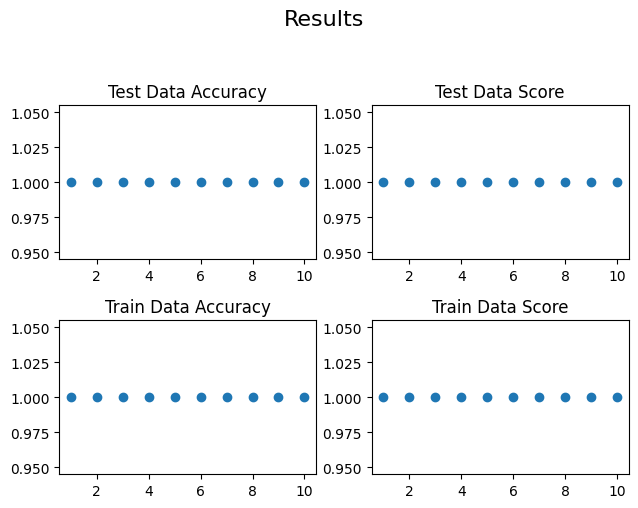

In [37]:
results = []
for k in range(1, 11):
    results.append(k_nearest_neighbors(k, False))
results = np.array(results)
x_results = list(range(1, 11))

fig_results, ax_results = plt.subplots(2, 2)
ax_results[0, 0].scatter(x_results, results[:, 0])
ax_results[0, 0].set_title('Test Data Accuracy')

ax_results[0, 1].scatter(x_results, results[:, 1])
ax_results[0, 1].set_title('Test Data Score')

ax_results[1, 0].scatter(x_results, results[:, 2])
ax_results[1, 0].set_title('Train Data Accuracy')

ax_results[1, 1].scatter(x_results, results[:, 3])
ax_results[1, 1].set_title('Train Data Score')

fig_results.suptitle('Results', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


# Project Conclusions

## Analysis Overview
The iris dataset used in this project revealed interesting properties after dimensionality reduction. When PCA was applied, the data demonstrated clear separability between classes, which led to excellent performance from both implemented classification methods.